In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

##### 生成数据集

In [2]:
def synthetic_data(w,b,num_examples):
    "生成y=xw+b的噪声"
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w)+b
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

In [5]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([ 0.2564, -1.7736]) 
label: tensor([10.7524])


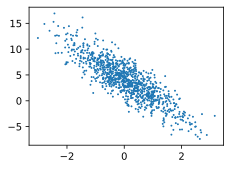

In [7]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)],labels,1);

##### 读取数据集

In [10]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

In [12]:
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 0.6628, -0.5351],
        [ 1.1240, -1.2166],
        [-0.2714,  0.2639],
        [ 0.5291, -1.7427],
        [ 1.2067,  0.7153],
        [ 0.6120,  1.7313],
        [ 1.1683, -0.4110],
        [-0.8169,  0.6789],
        [-0.2098,  0.2459],
        [ 0.8461, -0.0191]]) 
 tensor([[ 7.3531],
        [10.5824],
        [ 2.7537],
        [11.1902],
        [ 4.1773],
        [-0.4650],
        [ 7.9446],
        [ 0.2725],
        [ 2.9485],
        [ 5.9519]])


##### 初始化模型参数

In [13]:
w = torch.normal(0,0.01,size = (2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [14]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

##### 定义损失函数

In [15]:
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape)) **2/2

##### 定义优化算法

In [16]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad / batch_size
            param.grad.zero_()

In [17]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch + 1},loss {float(train_l.mean()):f}')

epoch1,loss 0.052456
epoch2,loss 0.000236
epoch3,loss 0.000049
